The SMBHB Merger Rate
=====================

*Author:* Dr. J. Andrew Casey-Clyde

*Date:* 2024-11-20

In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
%matplotlib inline
sns.set_context("notebook")
sns.set_style('ticks')
sns.set_palette('colorblind')
rcparams = {
    'text.latex.preamble': r'\\usepackage{amsmath}',
    'text.usetex': False,
    'xtick.direction': 'in',
    'xtick.top': True,
    'xtick.minor.visible': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'ytick.minor.visible': True,
    'legend.frameon': False
    # 'axes.labelsize': 18
}
plt.rcParams.update(rcparams)
cs = plt.rcParams['axes.prop_cycle'].by_key()['color']
ls = ['-', '--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]

FW, FH = plt.rcParams["figure.figsize"]

## Introduction

Supermassive black holes (SMBHs) can pair as a result of galaxy mergers, eventually forming a SMBH binary (SMBHB) that emits gravitational waves (GWs) before coalescing. The superposition of GWs from the cosmic population of SMBHBs forms a GW background (GWB), which we can detect with pulsar timing arrays. In this notebook we characterize the SMBHB population and its associated GWB in terms of the SMBHB merger rate. Since the GWB depends entirely on the merger rate of SMBHBs at different masses and redshifts, this is the most common way to model the SMBHB population.

The rest of this notebook is laid out as follows:
In Section 2 we relate the characteristic strain of the GWB to the SMBHB merger rate.
In Section 3 we define the sampling grid we use for our SMBHB merger rates.
In Section 4 we model the SMBHB merger rate using a previously sampled set of parameters.
In Section 5 we summarize our results.

## The Gravitational Wave Background

The GWB is built up from the incoherent superposition of GWs from the cosmic population of supermassive black hole binaries \citep{begelman_massive_1980,phinney_practical_2001}.
To illustrate the connection between the GWB and SMBHBs, in this section we derive a model of the GWB based on the total energy density of GWs in the universe.
We then derive expressions connecting the characteristic strain spectrum of the GWB to the SMBHB merger rate in the universe, following arguments from \citet{phinney_practical_2001} and \citet{sesana_stochastic_2008}.

The present-day energy density of the GWB, $\rho_{\mathrm{GW}}(f_{\mathrm{GW}})$, per logarithmic frequency interval is related to the characteristic strain, $h_{c}(f)$, by \citep{phinney_practical_2001,sesana_stochastic_2008}
\begin{equation}
    \frac{1}{\rho_{c}} \frac{d \rho_{\mathrm{GW}}(f)}{d \ln f_{\mathrm{GW}}} = \frac{\pi}{4} f_{\mathrm{GW}}^{2} h_{c}^{2}(f_{\mathrm{GW}}) \, ,
\end{equation}
where $\rho_{c} = 4 H_{0}^{2} / (8 \pi)$ is the critical energy density needed to close the universe.
Next let $\phi_{\mathrm{BHB}}(z) dz$ be the co-moving number density of GW events occurring between redshift $z$ and $z + dz$.
The energy density spectrum, \cref{eq:gw_energy_density_spec}, of the GWB can be found by integrating the energy density emitted per logarithmic frequency interval over $z$:
\begin{equation}
    \frac{1}{\rho_{c}} \frac{d \rho_{\mathrm{GW}}(f)}{d \ln f_{\mathrm{GW}}} = \int_{0}^{\infty} \phi(z) \frac{1}{1 + z} \left(\frac{dE}{d\ln f_{\mathrm{GW}, r}}\right|_{f_{\mathrm{GW}, r} = f_{\mathrm{GW}} (1 + z)} d{z} \, ,
\end{equation}
where $f_{\mathrm{GW}, r} = f_{\mathrm{GW}} (1 + z)$ is the GW frequency in the binary rest-frame, the factor of $1 / (1 + z)$ accounts for the redshifting of GWs since emission, and
$dE / d \ln f_{\mathrm{GW}, r}$ is the energy emitted per logarithmic frequency interval.
For a SMBHB, we can find $dE / d \ln f_{\mathrm{GW}, r}$ by first expressing the energy radiated by the binary, \cref{eq:dE_dt}, in terms of $f_{\mathrm{GW}}$ using Kepler's Third Law, \cref{eq:kepler3}:
\begin{equation}
    \frac{dE}{dt} = -\frac{32}{5} \pi^{10/3} \mathcal{M}^{10 / 3} f_{\mathrm{GW}, r}^{10/3} \, .
\end{equation}
Combining \cref{eq:dE_dt_fgw} with \cref{eq:f_dot_ch1}, we find
\begin{align}
    \frac{dE}{d \ln f_{\mathrm{GW}, r}} &= \frac{dE}{d f_{\mathrm{GW}, r}} f_{\mathrm{GW}, r} \nonumber \\
    &= \frac{dE}{dt} \frac{dt}{df_{\mathrm{GW}, r}} f_{\mathrm{GW}, r} \nonumber \\
    % &= \frac{dE}{dt} \dot{f}_{\mathrm{GW}, r}^{-1} f_{\mathrm{GW}, r} \nonumber \\
    % &= \frac{32}{5} \pi^{10/3} \mathcal{M}^{10 / 3} f_{\mathrm{GW}, r}^{10/3} \left(\frac{96}{5} \pi^{8 / 3} \mathcal{M}^{5 / 3} f_{\mathrm{GW}}^{11/3}\right)^{-1} \ nonumber \\
    &= \frac{\pi^{2 / 3}}{3} \mathcal{M}^{5 / 3} f_{\mathrm{GW}, r}^{2/3} \, ,
    % a^{3} = M \pi^{-2} f^{-2}
    % a^{-5} = M^{-5/3} \pi^{10/3} f^_{10/3}
\end{align}
where in going from the second to the third line we make use of the fact that $\frac{d{t}}{d{f_{\mathrm{GW}, r}}} = \dot{f}_{\mathrm{GW}, r}^{-1}$.
As we can see, the energy emitted depends on the chirp mass of the binary, $\mathcal{M}$.
We therefore define
\begin{equation}
    \phi_{\mathrm{BHB}}(z) = \frac{d \Phi_{\mathrm{BHB}}}{dz} = \int_{0}^{\infty} \frac{d^{2}{\Phi_{\mathrm{BHB}}}}{d{z} d{\mathcal{M}}} d{\mathcal{M}} = \int_{0}^{\infty} \phi_{\mathrm{BHB}}(z, \mathcal{M}) d{\mathcal{M}} \, ,
\end{equation}
where $d^{2}{\Phi_{\mathrm{BHB}}} / (d{z} d{\mathcal{M}})$ is the differential number density of binaries per unit co-moving volume, $\Phi_{\mathrm{BHB}}$, per unit $z$ and $\mathcal{M}$.
Notably, this is related to the SMBHB merger rate,
\begin{equation}
    \dot{\phi}_{\mathrm{BHB}}(\mathcal{M}, z) = \frac{d^{2}{\Phi_{\mathrm{BHB}}}}{d{z} d{\mathcal{M}}} \frac{d{z}}{d{t}} \, ,
\end{equation}
where
\begin{equation}
    \frac{dt}{dz} = \frac{1}{H_{0}} \frac{1}{E(z) (1 + z)}  \, ,
\end{equation}
is the differential change in $z$ per unit proper time, $t$, $H_{0}$ is the Hubble constant, 
\begin{equation}
    E(z) = \sqrt{\Omega_{M} (1 + z)^{3} + \Omega_{k} (1 + z)^{2} + \Omega_{\Lambda}} \, ,
\end{equation}
and $\Omega_{M}$, $\Omega_{k}$, and $\Omega_{\Lambda}$ are cosmological parameters denoting the relative energy density of the universe due to mass, curvature, and dark energy, respectively \citep{hogg_distance_1999}.

Substituting \Cref{eq:dE_dlnfr,eq:diff_num_dens} in 
\cref{eq:energy_density_events}, and combining with \cref{eq:gw_energy_density_spec}, we therefore find
\begin{equation}
    h_{c}^{2}(f_{\mathrm{GW}}) = \frac{4}{3 \pi^{1 / 3}} \frac{1}{f_{\mathrm{GW}}^{4 / 3}} \int_{0}^{\infty} \int_{0}^{\infty} \phi_{\mathrm{BHB}}(z, \mathcal{M}) \frac{\mathcal{M}^{5/3}}{(1 + z)^{1 / 3}} d{\mathcal{M}} d{z} \, .
\end{equation}
We can see from \cref{eq:gwb_smbhbs_chirp} that the characteristic strain of the GWB is determined entirely by $\phi(z, \mathcal{M})$.
Since $h_{c}(f_{\mathrm{GW}}) \propto f^{-2 / 3}$, the characteristic strain is frequently modeled as a power-law such that
\begin{equation}
    h_{c}(f_{\mathrm{GW}}) = A_{\mathrm{GWB}} \left(\frac{f_{\mathrm{GW}}}{1 \; \mathrm{yr}^{-1}}\right)^{-2 / 3} \, ,
\end{equation}
where $A_{\mathrm{GWB}}$ is the amplitude of the GWB at an arbitrary reference frequency of $1 \; \mathrm{yr}^{-1}$.

Finally, we also note that \cref{eq:gwb_smbhbs_chirp} can be written in terms of the $M_{\mathrm{BH}, 12}$ and the binary mass ratio, $q = M_{\mathrm{BH}, 2} / M_{\mathrm{BH}, 1}$. These are related to the chirp mass by $\mathcal{M} = \left[q^{3 / 5} / (1 + q)^{6 / 5}\right] M_{\mathrm{BH}, 12}$, such that \citep{chen_constraining_2019}
\begin{equation}
    \phi_{\mathrm{BHB}}(z, \mathcal{M}) = \frac{d^{2} \Phi_{\mathrm{BHB}}}{d{z} d{\mathcal{M}}} = \int \frac{d^{3} \Phi_{\mathrm{BHB}}}{d{z} d{M_{\mathrm{BH}, 12}} d{q}} \frac{d{M_{\mathrm{BH}, 12}}}{d{\mathcal{M}}} d{q} \, .
\end{equation}
Changing variables from $\mathcal{M}$ to $M_{\mathrm{BH}, 12}$  and $q$ in \cref{eq:gwb_smbhbs_chirp}, we therefore have
\begin{equation}
    h_{c}^{2}(f_{\mathrm{GW}}) = \frac{4}{3 \pi^{1 / 3}} \frac{1}{f_{\mathrm{GW}}^{4 / 3}} \int_{0}^{\infty} \int_{0}^{\infty} \int_{0}^{1} \frac{d^{3} \Phi_{\mathrm{BHB}}}{d{z} d{M_{\mathrm{BH}, 12}} d{q}} \frac{M_{\mathrm{BH}, 12}^{5/3}}{(1 + z)^{1 / 3}} \frac{q}{(1 + q)^{2}} d{M_{\mathrm{BH}, 12}} d{z} d{q} \, ,
\end{equation}
which directly relates $h_{c}(f_{\mathrm{GW}})$ to the distribution of $M_{\mathrm{BH}, 12}$.

## Data

Here we define the sampling grids we use through the rest of this notebook.

In [3]:
import numpy as np
from scipy.stats import norm

# Hyperparameters, such as grid size
N_MESH = np.power(2, 4)
QUANTILES = [
    norm.cdf(-2),
    norm.cdf(-1),
    norm.cdf(0),
    norm.cdf(1),
    norm.cdf(2)
]

# Properties to sample over
log10_mgal = np.linspace(9, 12, num=N_MESH)
log10_mbulge = np.linspace(8, 12, num=N_MESH)
log10_mbhb = np.linspace(8, 10.5, num=N_MESH)
redz = np.linspace(0, 5, num=N_MESH)
q_gal = np.linspace(.25, 1, num=N_MESH)

We also load pre-computed parameters, which have been fit to NANOGrav's 15 yr GWB amplitude.

In [4]:
import os
import h5py
from oddagn.config import EXTERNAL_DATA_DIR

with h5py.File(os.path.join(EXTERNAL_DATA_DIR, 'bhb_merger_rate_params.h5'), 'r') as hf:
    bhb_merger_rate_params = np.array(hf['bhbmf_chains'])

bhb_merger_rate_params = bhb_merger_rate_params.T
bhb_merger_rate_params = bhb_merger_rate_params[::40]  # thin a bit
print(f"np.shape(bhb_merger_rate_params): {np.shape(bhb_merger_rate_params)}")

2024-11-20 22:12:43.625 | INFO     | oddagn.config:<module>:13 - PROJ_ROOT path is: /vast/palmer/home.grace/jc4368/oddAGN


np.shape(bhb_merger_rate_params): (1000, 16)


## The Supermassive Black Hole Binary Merger Rate

Here we model the SMBHB merger rate in three steps: we calculate a galaxy pairing rate, then a galaxy merger rate, and finally a SMBHB merger rate.
Specifically, we follow galaxy mergers to SMBHB mergers as in \citetalias{chen_constraining_2019}.
We simultaneously assume a galaxy stellar mass function (GSMF), $\phi_{*}(M_{*}, z)$, a galaxy pair fraction, $\mathcal{F}_{\mathrm{p}}$, and galaxy merger timescale, $\tau_{\mathrm{m}}$, which gives us a galaxy pairing rate, $\dot{\phi}_{*, \mathrm{p}} = d^{3} \Phi_{*,\mathrm{p}} / (d \log M_{*} dq_{*} dt)$.
This is the differential comoving number density of paired galaxies, $\Phi_{*, \mathrm{p}}$, at pairing redshift $z_{\mathrm{p}}$ per $M_{*}$, galaxy mass ratio, $q_{*}$, and time, $t$.
We model $\dot{\phi}_{*, \mathrm{p}}$ as
\begin{equation}
    \dot{\phi}_{*, \mathrm{p}}(M_{*}, z_{\mathrm{p}}, q_{*}) = \phi_{*}(M_{*}, z_{\mathrm{p}}) \frac{\mathcal{F}_{\mathrm{p}}(M_{*}, z_{\mathrm{p}}, q_{*})}{\tau_{\mathrm{m}}(M_{*}, z_{\mathrm{p}}, q_{*})}\, ,
\end{equation}
where $\mathcal{F}_{\mathrm{p}} = d f_{\mathrm{p}} / dq_{*}$ is the differential galaxy pair fraction, and $\tau_{\mathrm{m}}$ is the galaxy merger timescale \citep{conselice_early_2006,sesana_systematic_2013,casteels_galaxy_2014}.
We assume that $M_{*}$ is the mass of the merger remnant.

### The Galaxy Stellar Mass Function

Following \citetalias{chen_constraining_2019}, we model $\phi_{*} = d\Phi_{*} / d \log M_{*}$ as a redshift evolving Schechter function:
    \begin{equation}
        \phi_{*}(M_{*}, z) = \ln10 \Phi_{*}(z) \left(\frac{M_{*}}{M_{0}}\right)^{1 + \alpha_{*}(z)} \exp\left(-\frac{M_{*}}{M_{0}}\right) \, .
    \end{equation}
Here $M_{*}$ is the galaxy stellar mass while $\log \Phi_{*}(z) = \phi_{0} + \phi_{1} z$ and $\alpha_{*}(z) = \alpha_{0} + \alpha_{1} z$ are phenomenological functions of $z$.

In [5]:
# first we load and breakdown all the parameter values
gsmf_phi0 = bhb_merger_rate_params[:, 0]
gsmf_phi1 = bhb_merger_rate_params[:, 1]
gsmf_log10_mbreak = bhb_merger_rate_params[:, 2]
gsmf_alpha0 = bhb_merger_rate_params[:, 3]
gsmf_alpha1 = bhb_merger_rate_params[:, 4]

print("gsmf_phi0 = {0:.2f}".format(np.median(gsmf_phi0)))
print("gsmf_phi1 = {0:.2f}".format(np.median(gsmf_phi1)))
print("gsmf_log10_mbreak = {0:.2f}".format(np.median(gsmf_log10_mbreak)))
print("gsmf_alpha0 = {0:.2f}".format(np.median(gsmf_alpha0)))
print("gsmf_alpha1 = {0:.2f}".format(np.median(gsmf_alpha1)))

gsmf_phi0 = -2.65
gsmf_phi1 = -0.36
gsmf_log10_mbreak = 11.28
gsmf_alpha0 = -1.18
gsmf_alpha1 = -0.07


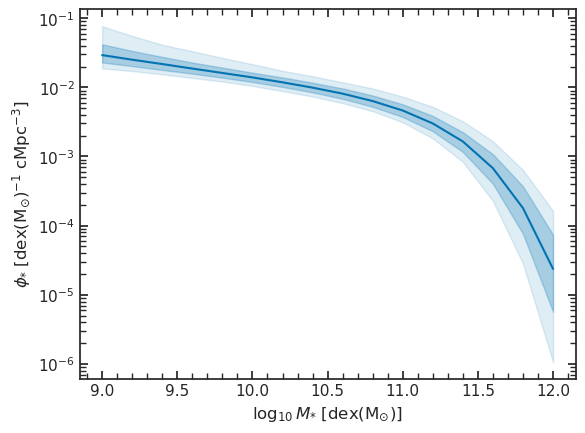

In [6]:
from oddagn.galaxy_models import galaxy_stellar_mass_function

fig, ax = plt.subplots()

gsmf = galaxy_stellar_mass_function(
    log10_mgal[None, :, None], 
    redz[None, None, :],
    phi0=gsmf_phi0[:, None, None],
    phi1=gsmf_phi1[:, None, None],
    log10_mbreak=gsmf_log10_mbreak[:, None, None],
    alpha0=gsmf_alpha0[:, None, None],
    alpha1=gsmf_alpha1[:, None, None]
)

gsmf_integ = np.trapezoid(gsmf, redz, axis=2)
gsmf_integ_quantiles = np.quantile(gsmf_integ, q=QUANTILES, axis=0)

ax.plot(log10_mgal, gsmf_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mgal,
    gsmf_integ_quantiles[1], 
    gsmf_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mgal,
    gsmf_integ_quantiles[0], 
    gsmf_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\phi_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1} \; \mathrm{cMpc}^{-3}]$")

plt.show()

del gsmf, gsmf_integ, gsmf_integ_quantiles

### The Galaxy Pair Fraction

We model the galaxy pair fraction as
\begin{equation}
\mathcal{F}_{\mathrm{p}}(M_{*}, z_{\mathrm{p}}, q_{*}) = f_{0} \left(\frac{M_{*}}{10^{11} \; \mathrm{M}_{\odot}}\right)^{\alpha_{f}} (1 + z_{\mathrm{p}})^{\beta_{f}} q^{\gamma_{f}} \, ,
\end{equation}
where $f_{0}$ is the local fraction of galaxies in major mergers at arbitrary reference mass $M_{*} = 10^{11} \; \mathrm{M}_{\odot}$, and $\alpha_{f}$, $\beta_{f}$, and $\gamma_{f}$ determine how $\mathcal{F}_{\mathrm{p}}$ varies with $M_{*}$, $z_{\mathrm{p}}$, and $q_{*}$, respectively.

In [7]:
# first we load and breakdown all the parameter values
pair_frac_f0 = bhb_merger_rate_params[:, 5]
pair_frac_alpha = bhb_merger_rate_params[:, 6]
pair_frac_beta = bhb_merger_rate_params[:, 7]
pair_frac_gamma = bhb_merger_rate_params[:, 8]

print("pair_frac_f0 = {0:.2f}".format(np.median(pair_frac_f0)))
print("pair_frac_alpha = {0:.2f}".format(np.median(pair_frac_alpha)))
print("pair_frac_beta = {0:.2f}".format(np.median(pair_frac_beta)))
print("pair_frac_gamma = {0:.2f}".format(np.median(pair_frac_gamma)))

pair_frac_f0 = 0.03
pair_frac_alpha = 0.06
pair_frac_beta = 1.26
pair_frac_gamma = 0.00


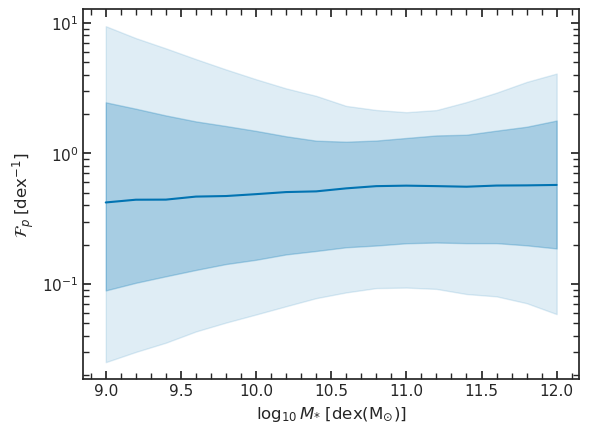

In [8]:
from oddagn.galaxy_models import galaxy_pair_fraction

fig, ax = plt.subplots()

pair_frac = galaxy_pair_fraction(
    log10_mgal[None, :, None, None], 
    redz[None, None, :, None],
    q_gal[None, None, None, :],
    f0=pair_frac_f0[:, None, None, None],
    alpha=pair_frac_alpha[:, None, None, None],
    beta=pair_frac_beta[:, None, None, None],
    gamma=pair_frac_gamma[:, None, None, None],
)

pair_frac_integ = np.trapezoid(pair_frac, q_gal, axis=3)
pair_frac_integ = np.trapezoid(pair_frac_integ, redz, axis=2)
pair_frac_integ_quantiles = np.quantile(pair_frac_integ, q=QUANTILES, axis=0)

ax.plot(log10_mgal, pair_frac_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mgal,
    pair_frac_integ_quantiles[1], 
    pair_frac_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mgal,
    pair_frac_integ_quantiles[0], 
    pair_frac_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\mathcal{F}_{p} \; [\mathrm{dex}^{-1}]$")

plt.show()

del pair_frac, pair_frac_integ, pair_frac_integ_quantiles

### The Galaxy Merger Timescale

We similarly model the galaxy merger timescale as
\begin{equation}
\tau_{\mathrm{m}}(M_{*}, z_{\mathrm{p}}, q_{*}) = \tau_{0} \left(\frac{M_{*}}{b M_{0}} \right)^{\alpha_{\tau}} (1 + z_{\mathrm{p}})^{\beta_{\tau}} q^{\gamma_{\tau}} \, ,
\end{equation}
where $b M_{0} = 0.4 / h_{0} \times 10^{11} \; \mathrm{M}_{\odot}$, and $\tau_{0}$, $\alpha_{\tau}$, $\beta_{\tau}$, and $\gamma_{\tau}$ are defined analogously to their counterparts in \cref{eq:gal_frac}.

In [9]:
# first we load and breakdown all the parameter values
merger_time_tau0 = bhb_merger_rate_params[:, 9]
merger_time_alpha = bhb_merger_rate_params[:, 10]
merger_time_beta = bhb_merger_rate_params[:, 11]
merger_time_gamma = bhb_merger_rate_params[:, 12]

print("merger_time_f0 = {0:.2f}".format(np.median(merger_time_tau0)))
print("merger_time_alpha = {0:.2f}".format(np.median(merger_time_alpha)))
print("merger_time_beta = {0:.2f}".format(np.median(merger_time_beta)))
print("merger_time_gamma = {0:.2f}".format(np.median(merger_time_gamma)))

merger_time_f0 = 2.42
merger_time_alpha = -0.09
merger_time_beta = -2.12
merger_time_gamma = 0.01


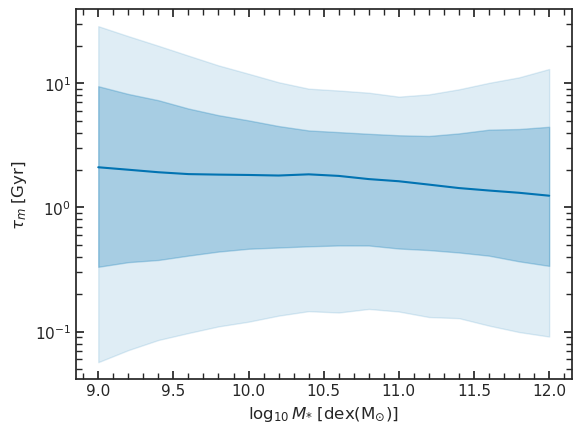

In [10]:
from oddagn.galaxy_models import galaxy_merger_timescale

fig, ax = plt.subplots()

merger_time = galaxy_merger_timescale(
    log10_mgal[None, :, None, None], 
    redz[None, None, :, None],
    q_gal[None, None, None, :],
    tau0=merger_time_tau0[:, None, None, None],
    alpha=merger_time_alpha[:, None, None, None],
    beta=merger_time_beta[:, None, None, None],
    gamma=merger_time_gamma[:, None, None, None],
)

merger_time_integ = np.trapezoid(merger_time, q_gal, axis=3)
merger_time_integ = np.trapezoid(merger_time_integ, redz, axis=2)
merger_time_integ_quantiles = np.quantile(merger_time_integ, q=QUANTILES, axis=0)

ax.plot(log10_mgal, merger_time_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mgal,
    merger_time_integ_quantiles[1], 
    merger_time_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mgal,
    merger_time_integ_quantiles[0], 
    merger_time_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\tau_{m} \; [\mathrm{Gyr}]$")

plt.show()

del merger_time, merger_time_integ, merger_time_integ_quantiles

### The Galaxy Pairing Rate

We now combine the above to compute $\dot{\phi}_{*, \mathrm{p}}$, shown below.

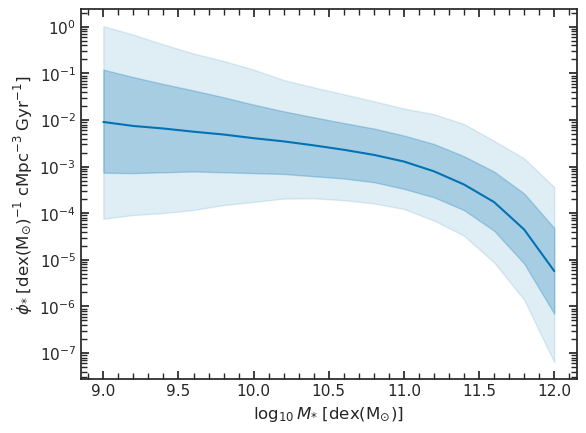

In [11]:
from oddagn.galaxy_models import galaxy_pairing_rate

fig, ax = plt.subplots()

gpr = galaxy_pairing_rate(
    log10_mgal[None, :, None, None], 
    redz[None, None, :, None],
    q_gal[None, None, None, :],
    phi0=gsmf_phi0[:, None, None, None],
    phi1=gsmf_phi1[:, None, None, None],
    log10_mbreak=gsmf_log10_mbreak[:, None, None, None],
    alpha0=gsmf_alpha0[:, None, None, None],
    alpha1=gsmf_alpha1[:, None, None, None],
    f0=pair_frac_f0[:, None, None, None],
    alpha_f=pair_frac_alpha[:, None, None, None],
    beta_f=pair_frac_beta[:, None, None, None],
    gamma_f=pair_frac_gamma[:, None, None, None],
    tau0=merger_time_tau0[:, None, None, None],
    alpha_t=merger_time_alpha[:, None, None, None],
    beta_t=merger_time_beta[:, None, None, None],
    gamma_t=merger_time_gamma[:, None, None, None],
)

gpr_integ = np.trapezoid(gpr, q_gal, axis=3)
gpr_integ = np.trapezoid(gpr_integ, redz, axis=2)
gpr_integ_quantiles = np.quantile(gpr_integ, q=QUANTILES, axis=0)

ax.plot(log10_mgal, gpr_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mgal,
    gpr_integ_quantiles[1], 
    gpr_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mgal,
    gpr_integ_quantiles[0], 
    gpr_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\dot{\phi}_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1} \; \mathrm{cMpc}^{-3} \; \mathrm{Gyr}^{-1}]$")

plt.show()

del gpr, gpr_integ, gpr_integ_quantiles

### The Galaxy Merger Rate

We use the galaxy pairing rate to compute the galaxy merger rate, $\dot{\phi}_{*, \mathrm{m}}$, assuming $\dot{\phi}_{*, \mathrm{p}}(M_{*}, z_{\mathrm{p}}, q_{*}) = \dot{\phi}_{*, \mathrm{m}}(M_{*}, z_{\mathrm{m}}, q_{*})$, i.e., the galaxy pairing rate at $z_{\mathrm{p}}$ gives the merger rate at $z_{\mathrm{m}}$, the merger redshift.
Since the proper time elapsed between $z_{\mathrm{m}}$ and $z_{\mathrm{p}}$ is given by $\tau_{\mathrm{m}}$, the difference between $z_{\mathrm{p}}$ and $z_{\mathrm{m}}$ can be found by implicitly solving
\begin{equation}
    \int_{z_{\mathrm{m}}}^{z_{\mathrm{p}}} \frac{dt}{dz} dz = \tau_{\mathrm{m}}(M_{*}, z_{\mathrm{p}}, q_{*}) \, ,
\end{equation}
where $dt / dz$ is the change in proper time per unit redshift and is given by standard cosmology \citep{hogg_distance_1999}.

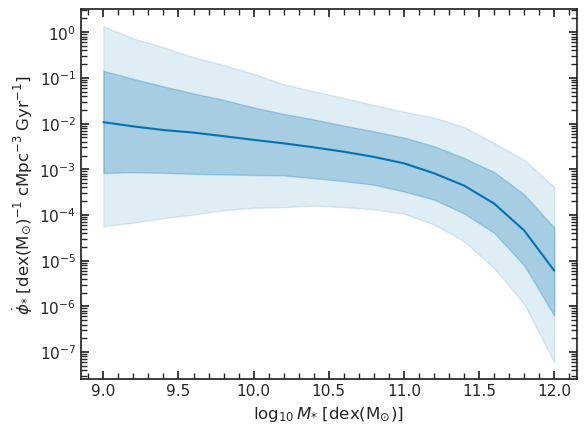

CPU times: user 9.53 s, sys: 1.21 s, total: 10.7 s
Wall time: 10.8 s


In [12]:
%%time

from oddagn.galaxy_models import galaxy_merger_rate

fig, ax = plt.subplots()

gmr = galaxy_merger_rate(
    log10_mgal, 
    redz,
    q_gal,
    phi0=gsmf_phi0,
    phi1=gsmf_phi1,
    log10_mbreak=gsmf_log10_mbreak,
    alpha0=gsmf_alpha0,
    alpha1=gsmf_alpha1,
    f0=pair_frac_f0,
    alpha_f=pair_frac_alpha,
    beta_f=pair_frac_beta,
    gamma_f=pair_frac_gamma,
    tau0=merger_time_tau0,
    alpha_t=merger_time_alpha,
    beta_t=merger_time_beta,
    gamma_t=merger_time_gamma,
)

gmr_integ = np.trapezoid(gmr, q_gal, axis=3)
gmr_integ = np.trapezoid(gmr_integ, redz, axis=2)
gmr_integ_quantiles = np.quantile(gmr_integ, q=QUANTILES, axis=0)

ax.plot(log10_mgal, gmr_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mgal,
    gmr_integ_quantiles[1], 
    gmr_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mgal,
    gmr_integ_quantiles[0], 
    gmr_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\dot{\phi}_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1} \; \mathrm{cMpc}^{-3} \; \mathrm{Gyr}^{-1}]$")

plt.show()

### The Binary Merger Rate

We next calculate the SMBHB merger rate from the galaxy merger rate in two steps.
First we assume scaling relations between bulge mass, $M_{\mathrm{bulge}}$, and $M_{*}$, accounting for differences in the bulge fractions of early and late type galaxies.
Then we adopt a scaling between $M_{\mathrm{bulge}}$ and SMBH mass, $M_{\mathrm{BH}}$.

To account for differences in the $M_{\mathrm{bulge}} - M_{*}$ scaling for early and late type galaxies, we adopt different scaling relations for these populations.
For early-type galaxies we assume a phenomenological scaling from \citetalias{chen_constraining_2019} \citep[cf.][]{bernardi_systematic_2014,sesana_selection_2016}:
\begin{equation}
    \frac{M_{\mathrm{bulge}}}{M_{*}} = \begin{cases}
        \frac{\sqrt{6.9}}{\left[\log \left(M_{*} / \mathrm{M}_{\odot}\right) - 10\right]^{1.5}} \exp\left[\frac{-3.45}{\log \left(M_{*} / \mathrm{M}_{\odot}\right) - 10}\right] + 0.615 & \text{if } \log\left( M_{*} / \mathrm{M}_{\odot}\right) > 10 \\
        0.615 & \text{if } \log \left(M_{*} / \mathrm{M}_{\odot}\right) \leq 10 \, ,
    \end{cases}
\end{equation}
with an intrinsic dispersion of $0.2 \; \mathrm{dex}$ \citep{sesana_selection_2016}.

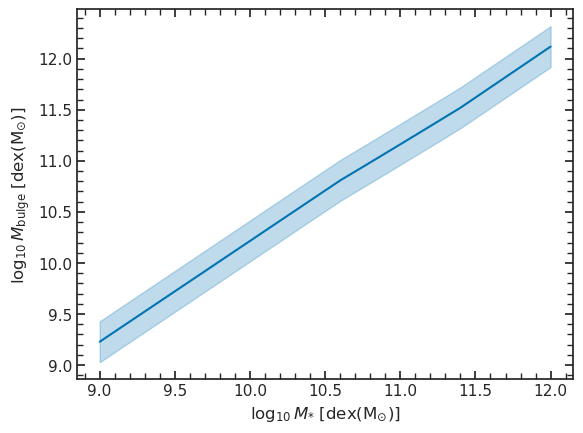

In [13]:
from oddagn.scaling_relations import log_mstellar_log_mbulge_scaling

fig, ax = plt.subplots()

mbulge_disp = .2
log10_mbulge_plot = log_mstellar_log_mbulge_scaling(log10_mgal)

ax.plot(log10_mgal, log10_mbulge_plot, color=cs[0])
ax.fill_between(
    log10_mgal,
    log10_mbulge_plot-mbulge_disp, 
    log10_mbulge_plot+mbulge_disp, 
    color=cs[0], 
    alpha=.25
)

ax.set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\log_{10} M_{\mathrm{bulge}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")

plt.show()

The probability, $P_{\mathrm{ET}}(M_{\mathrm{bulge}} \vert M_{*})$, that an early-type galaxy with stellar mass $M_{*}$ has a bulge of mass $M_{\mathrm{bulge}}$ is thus log-normally distributed with mean given by \autoref{eq:mg-mbulge} and dispersion $0.2$.
For late-type galaxies we assume $P_{\mathrm{LT}}(M_{\mathrm{bulge}} \vert M_{*}) = \mathcal{F}_{\mathrm{bulge, LT}} M_{*}$, where $\mathcal{F}_{\mathrm{bulge, LT}}$ is the bulge fraction of a late type galaxy which we assume is uniformly distributed between $0.1$ and $0.3$ \citep{sesana_systematic_2013}.

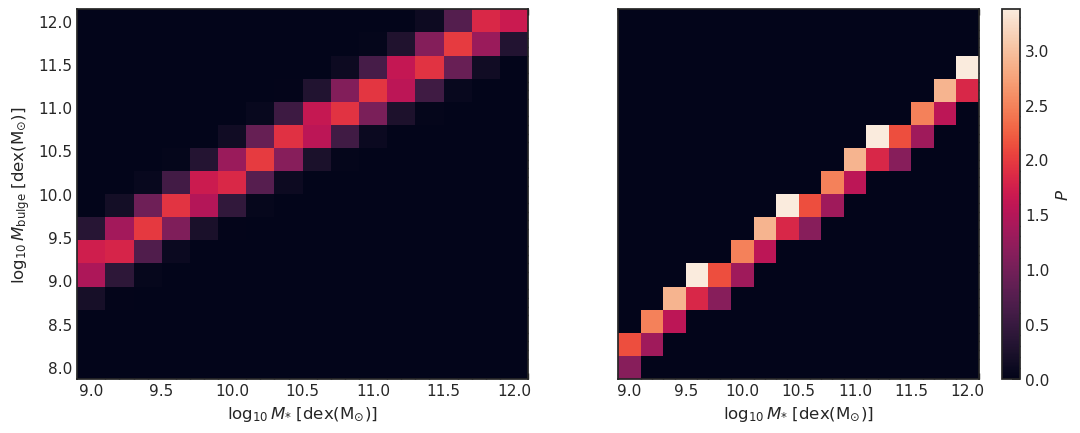

In [14]:
from oddagn.scaling_relations import prob_mbulge_mstellar_elliptical, prob_mbulge_mstellar_spiral

fig, ax = plt.subplots(ncols=2, figsize=[2*FW, FH], sharey=True)

prob_mbulge_mgal_et = prob_mbulge_mstellar_elliptical(log10_mbulge[:, None], log10_mgal[None, :], disp=mbulge_disp)
prob_mbulge_mgal_lt = prob_mbulge_mstellar_spiral(log10_mbulge[:, None], log10_mgal[None, :])

vmin = np.min([prob_mbulge_mgal_et, prob_mbulge_mgal_lt])
vmax = np.max([prob_mbulge_mgal_et, prob_mbulge_mgal_lt])

pcm = ax[0].pcolormesh(log10_mgal, log10_mbulge, prob_mbulge_mgal_et, vmin=vmin, vmax=vmax)
pcm = ax[1].pcolormesh(log10_mgal, log10_mbulge, prob_mbulge_mgal_lt, vmin=vmin, vmax=vmax)

cb = fig.colorbar(pcm)

ax[0].set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax[1].set_xlabel(r"$\log_{10} M_{*} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax[0].set_ylabel(r"$\log_{10} M_{\mathrm{bulge}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
cb.set_label(r"$P$")

plt.show()

We can then express $\phi_{*}$ in terms of bulge mass by convolving the galaxy stellar mass function with these probabilities as
\begin{equation}
    \phi_{\mathrm{bulge}} = \int \left[ \mathcal{F}_{\mathrm{ET}} P_{\mathrm{ET}}(M_{\mathrm{bulge}} \vert M_{*}) + (1 - \mathcal{F}_{\mathrm{ET}}) P_{\mathrm{LT}}(M_{\mathrm{bulge}} \vert M_{*}) \right] \phi_{*} d \log M_{*} \, ,
\end{equation}
where $\mathcal{F}_{\mathrm{ET}}$ is the fraction of galaxies which are early type galaxies.
We adopt the $z$-dependent $\mathcal{F}_{\mathrm{ET}}$ for massive galaxies from \citet{huertas-company_galaxy_2024}, which used the James Webb Space Telescope (JWST) to constrain galaxy morphology at $z \leq 6$.
Since that work only presents $\mathcal{F}_{\mathrm{ET}}$ in $z$ bins, we fit their results with the analytic expression
\begin{equation}
    \mathcal{F}_{\mathrm{ET}} = \begin{cases}
        \mathcal{F}_{\mathrm{ET}, 0} & z < z_{0} \\
        \mathcal{F}_{\mathrm{ET}, 0} \left[(1 + z) / (1 + z_{0}) \right]^{k} & z \geq z_{0} \, .
    \end{cases}
\end{equation}
We find the maximum likelihood values $\mathcal{F}_{\mathrm{ET}, 0} = 0.587$, $z_{ 0} = 2.808$, and $k = -3.775$ provide a very good fit to the values of $\mathcal{F}_{\mathrm{ET}}$ presented in \citet{huertas-company_galaxy_2024}.
We also try fitting power laws and sigmoid functions to the results of \citet{huertas-company_galaxy_2024}, but find that \autoref{eq:et_frac} provides a better fit than either of those forms.

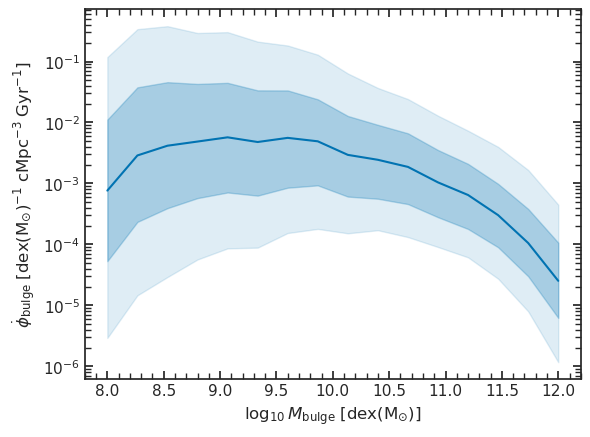

CPU times: user 10.7 s, sys: 1.37 s, total: 12.1 s
Wall time: 12.1 s


In [15]:
%%time

from oddagn.galaxy_models import bulge_merger_rate

fig, ax = plt.subplots()

bmr = bulge_merger_rate(
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    phi0=gsmf_phi0,
    phi1=gsmf_phi1,
    log10_mbreak=gsmf_log10_mbreak,
    alpha0=gsmf_alpha0,
    alpha1=gsmf_alpha1,
    f0=pair_frac_f0,
    alpha_f=pair_frac_alpha,
    beta_f=pair_frac_beta,
    gamma_f=pair_frac_gamma,
    tau0=merger_time_tau0,
    alpha_t=merger_time_alpha,
    beta_t=merger_time_beta,
    gamma_t=merger_time_gamma,
)  # [P, M, B, Z, Q]

bmr_integ = np.trapezoid(bmr, q_gal, axis=4)  # [P, B, M, Z]
bmr_integ = np.trapezoid(bmr_integ, redz, axis=3)  # [P, B, M]
bmr_integ = np.trapezoid(bmr_integ, log10_mgal, axis=2)  # [P, B]
bmr_integ_quantiles = np.quantile(bmr_integ, q=QUANTILES, axis=0)  # [B]

ax.plot(log10_mbulge, bmr_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mbulge,
    bmr_integ_quantiles[1], 
    bmr_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mbulge,
    bmr_integ_quantiles[0], 
    bmr_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{\mathrm{bulge}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\dot{\phi}_{\mathrm{bulge}} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1} \; \mathrm{cMpc}^{-3} \; \mathrm{Gyr}^{-1}]$")

plt.show()

We next assume a log-linear scaling between $M_{\mathrm{bulge}}$ and SMBH mass, $M_{\mathrm{BH}}$:
\begin{equation}
    \log M_{\mathrm{BH}} = \alpha_{*} \log \left(\frac{M_{\mathrm{bulge}}}{10^{11} \; \mathrm{M}_{\odot}}\right) + \beta_{*} \pm \varepsilon_{*} \, ,
\end{equation}
where $\alpha_{*}$ and $\beta_{*}$ are, respectively, the slope and intercept of the $M_{\mathrm{BH}} - M_{\mathrm{bulge}}$ relation, and $\varepsilon_{*}$ is the intrinsic dispersion.
We compute the SMBH mass function, $\phi_{\mathrm{BH}}$, by convolving $\phi_{\mathrm{bulge}}$ with $P(M_{\mathrm{BH}} \vert M_{\mathrm{bulge}})$, which is the probability a galaxy with $M_{\mathrm{bulge}}$ hosts a SMBH with $M_{\mathrm{BH}}$ \citep{marconi_local_2004}:
\begin{equation}
    \phi_{\mathrm{BH}} = \int P(M_{\mathrm{BH}} \vert M_{\mathrm{bulge}}) \phi_{\mathrm{bulge}} d \log M_{\mathrm{bulge}} \, ,
\end{equation}
where
\begin{equation}
    P(M_{\mathrm{BH}} \vert M_{\mathrm{bulge}}) = \frac{1}{\sqrt{2 \pi} \varepsilon_{*}} \exp\left\{-\frac{1}{2}\left[\frac{\log M_{\mathrm{BH}} - \beta_{*} - \alpha_{*} \log \left(M_{\mathrm{bulge}} / 10^{11}\; \mathrm{M}_{\odot}\right)}{\varepsilon_{*}}\right]^{2}\right\} \, .
\end{equation}

In [16]:
# first we load and breakdown all the parameter values
mmbulge_beta_mbh = bhb_merger_rate_params[:, 13]
mmbulge_alpha_mbh = bhb_merger_rate_params[:, 14]
mmbulge_eps_mbh = bhb_merger_rate_params[:, 15]

print("mmbulge_alpha_mbh = {0:.2f}".format(np.median(mmbulge_alpha_mbh)))
print("mmbulge_beta_mbh = {0:.2f}".format(np.median(mmbulge_beta_mbh)))
print("mmbulge_eps_mbh = {0:.2f}".format(np.median(mmbulge_eps_mbh)))

mmbulge_alpha_mbh = 1.02
mmbulge_beta_mbh = 8.59
mmbulge_eps_mbh = 0.39


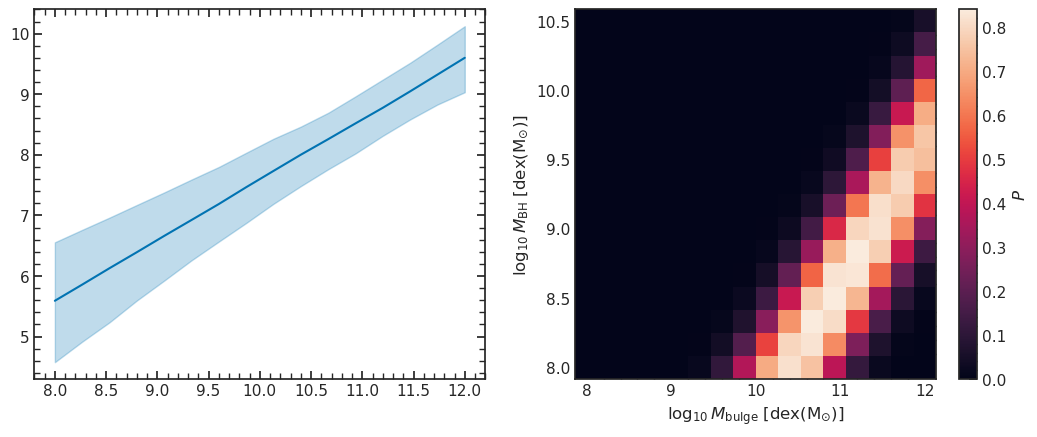

In [17]:
from oddagn.scaling_relations import log_mbh_log_mbulge_scaling, prob_mbh_mbulge

fig, ax = plt.subplots(ncols=2, figsize=[2*FW, FH])

mbh_disp = mmbulge_eps_mbh * norm.rvs(size=len(mmbulge_alpha_mbh))
log10_mbh_plot = log_mbh_log_mbulge_scaling(
    log10_mbulge[None, :], 
    alpha=mmbulge_alpha_mbh[:, None], 
    beta=mmbulge_beta_mbh[:, None]
)

log10_mbh_plot = log10_mbh_plot + mbh_disp[:, None]
log10_mbh_plot_quantiles = np.quantile(log10_mbh_plot, q=QUANTILES, axis=0)

ax[0].plot(log10_mbulge, log10_mbh_plot_quantiles[2], color=cs[0])
ax[0].fill_between(
    log10_mbulge,
    log10_mbh_plot_quantiles[1], 
    log10_mbh_plot_quantiles[3], 
    color=cs[0], 
    alpha=.25
)

prob_mbh_mbulge = prob_mbh_mbulge(
    log10_mbhb[None, :, None], 
    log10_mbulge[None, None, :], 
    alpha_mbh=mmbulge_alpha_mbh[:, None, None], 
    beta_mbh=mmbulge_beta_mbh[:, None, None],
    disp=mmbulge_eps_mbh[:, None, None]
)
prob_mbh_mbulge = np.median(prob_mbh_mbulge, axis=0)

pcm = ax[1].pcolormesh(log10_mbulge, log10_mbhb, prob_mbh_mbulge)
cb = fig.colorbar(pcm)
cb.set_label(r"$P$")

ax[1].set_xlabel(r"$\log_{10} M_{\mathrm{bulge}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax[1].set_ylabel(r"$\log_{10} M_{\mathrm{BH}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")

plt.show()

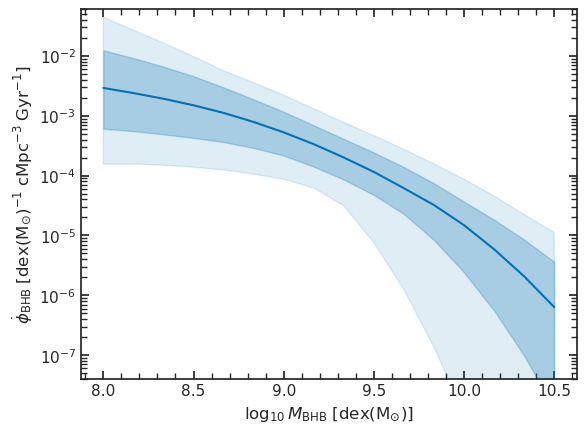

CPU times: user 17.3 s, sys: 4.28 s, total: 21.6 s
Wall time: 21.6 s


In [18]:
%%time

from oddagn.smbhb_models import binary_merger_rate

fig, ax = plt.subplots()

bhmr = binary_merger_rate(
    log10_mbhb,
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    phi0=gsmf_phi0,
    phi1=gsmf_phi1,
    log10_mbreak=gsmf_log10_mbreak,
    alpha0=gsmf_alpha0,
    alpha1=gsmf_alpha1,
    f0=pair_frac_f0,
    alpha_f=pair_frac_alpha,
    beta_f=pair_frac_beta,
    gamma_f=pair_frac_gamma,
    tau0=merger_time_tau0,
    alpha_t=merger_time_alpha,
    beta_t=merger_time_beta,
    gamma_t=merger_time_gamma, 
    alpha_mbh=mmbulge_alpha_mbh, 
    beta_mbh=mmbulge_beta_mbh,
    eps_mbh=mmbulge_eps_mbh
)  # [P, M, B, Z, Q]

bhmr_integ = np.trapezoid(bhmr, q_gal, axis=5)  # [P, H, B, M, Z]
bhmr_integ = np.trapezoid(bhmr_integ, redz, axis=4)  # [P, H, B, M]
bhmr_integ = np.trapezoid(bhmr_integ, log10_mgal, axis=3)  # [P, H, B]
bhmr_integ = np.trapezoid(bhmr_integ, log10_mbulge, axis=2)  # [P, H]
bhmr_integ_quantiles = np.quantile(bhmr_integ, q=QUANTILES, axis=0)  # [H]

ax.plot(log10_mbhb, bhmr_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mbhb,
    bhmr_integ_quantiles[1], 
    bhmr_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mbhb,
    bhmr_integ_quantiles[0], 
    bhmr_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{\mathrm{BHB}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\dot{\phi}_{\mathrm{BHB}} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1} \; \mathrm{cMpc}^{-3} \; \mathrm{Gyr}^{-1}]$")
ax.set_ylim(4e-8, 6e-2)

plt.show()

In [19]:
from IPython.display import display, Math
from oddagn.smbhb_models import characteristic_strain

bhmr_gwb = np.trapezoid(bhmr, log10_mgal, axis=3)  # [P, H, B, Z, Q]
bhmr_gwb = np.trapezoid(bhmr_gwb, log10_mbulge, axis=2)  # [P, H, Z, Q]

hc = characteristic_strain(log10_mbhb, redz, q_gal, bhmr_gwb, mmbulge_alpha_mbh)
hc_quantiles = np.quantile(hc, q=[.05, .5, .95])
hc_unc = np.diff(hc_quantiles)

hc_order = np.floor(np.log10(hc_quantiles[1]))
hc_med_norm = hc_quantiles[1] / np.power(10, hc_order)
hc_low_norm = hc_unc[0] / np.power(10, hc_order)
hc_high_norm = hc_unc[1] / np.power(10, hc_order)

display(Math(f"$h_{{c}}(f_{{\\mathrm{{GW}}}} = "
             f"1 \\; \\mathrm{{yr}}^{{-1}}) = "
             f"\\left({hc_med_norm:.1f}^{{+{hc_high_norm:.1f}}}_{{-{hc_low_norm:.1f}}}\\right) "
             f"\\times 10^{{{hc_order:.0f}}}$"))

<IPython.core.display.Math object>

## Discussion

In this notebook we have derived the relationship between the characteristic strain and the SMBHB merger rate.
We then presented a model of the SMBHB merger rate derived from the observable galaxy pairing rate.
Finally, we confirmed the amplitude of the GWB predicted by this model.
In our case, we find that the set of models included in this lab has a slightly larger upper limit than observed by NANOGrav, but otherwise reproduces NANOGrav's median and lower limit estimates.